In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

In [2]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(),name="weight")
b = tf.Variable(rng.randn(),name='bias')

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X,W),b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred - Y,2)) / (2*n_samples)

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.cast instead.


Epoch: 0050 cost= 0.098599739 W= 0.33191973 b= 0.20921776
Epoch: 0100 cost= 0.096098937 W= 0.32702342 b= 0.24444157
Epoch: 0150 cost= 0.093887106 W= 0.32241833 b= 0.27757093
Epoch: 0200 cost= 0.091930956 W= 0.31808698 b= 0.30873013
Epoch: 0250 cost= 0.090200983 W= 0.31401342 b= 0.33803484
Epoch: 0300 cost= 0.088670984 W= 0.31018203 b= 0.3655975
Epoch: 0350 cost= 0.087317884 W= 0.3065785 b= 0.39152098
Epoch: 0400 cost= 0.086121246 W= 0.30318943 b= 0.41590223
Epoch: 0450 cost= 0.085063010 W= 0.30000177 b= 0.43883345
Epoch: 0500 cost= 0.084127150 W= 0.29700372 b= 0.46040145
Epoch: 0550 cost= 0.083299547 W= 0.294184 b= 0.48068646
Epoch: 0600 cost= 0.082567759 W= 0.29153204 b= 0.49976403
Epoch: 0650 cost= 0.081920609 W= 0.28903782 b= 0.5177074
Epoch: 0700 cost= 0.081348367 W= 0.286692 b= 0.5345834
Epoch: 0750 cost= 0.080842331 W= 0.28448552 b= 0.5504564
Epoch: 0800 cost= 0.080394916 W= 0.28241023 b= 0.5653856
Epoch: 0850 cost= 0.079999253 W= 0.28045836 b= 0.57942736
Epoch: 0900 cost= 0.0796

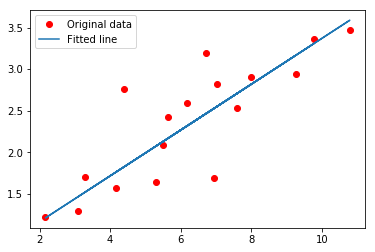

In [6]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X,train_Y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
        if (epoch+1) % display_step == 0:
            c = sess.run(cost,feed_dict={X:train_X,Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
    print("Optimization Finished!")
    training_cost = sess.run(cost,feed_dict={X:train_X,Y:train_Y})
    print("Training cost=",training_cost,"W=",sess.run(W),"b=",sess.run(b),'\n')
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()